# 딥러닝 (Week 6. Dimensionality reduction) ♣ 매우 중요

by Kyoungwon Seo (Dept. of Applied Artificial Intelligence, SeoulTech)
- e: kwseo@seoultech.ac.kr
- w: https://hai.seoultech.ac.kr

### [중요한 부분]
- 차원 축소
- 군집과 차원 축소와의 관계
- K에 대한 의사결정 과정

강의계획
1. 차원의 저주
2. 차원 축소를 위한 접근 방법
  - 투영
  - 매니폴드 학습
3. PCA
  - 분산 보존
  - 주성분
  - d차원으로 투영하기
  - 사이킷런 사용하기
  - 설명된 분산의 비율
  - 적절한 차원 수 선택하기
  - 압축을 위한 PCA
  - 랜덤 PCA
  - 점진적 PCA
4. 커널 PCA
  - 커널 선택과 하이퍼파라미터 튜닝
5. LLE
6. 다른 차원 축소 기법

## 1. [배경] 차원의 저주

### 1) 문제점

머신러닝 문제 속 많은 특성
- 훈련을 느리게 함 ♣
- 좋은 솔루션을 찾기 어렵게 만듦
- 이런 문제를 **차원의 저주(curse of dimensionality)**라고 함 ♣

### 2) 해결방안

#### (1) 차원 축소
- 차원의 저주를 해결하기 위한 방법: 특성 수를 크게 줄여서 불가능한 문제를 가능한 범위로 변경 ♣♣
- 차원을 축소시키면 일부 정보가 유실되어 시스템 성능이 조금 나빠질 수 있음 ♣♣
- 대신 차원 축소를 통해 훈련 속도가 빨라질 수 있음 ♣♣
- 데이터 시각화(DataViz, data visualization)에 유용 --> 군집 같은 시각적 패턴을 감지해 중요한 통찰을 얻을 수 있음 ♣♣

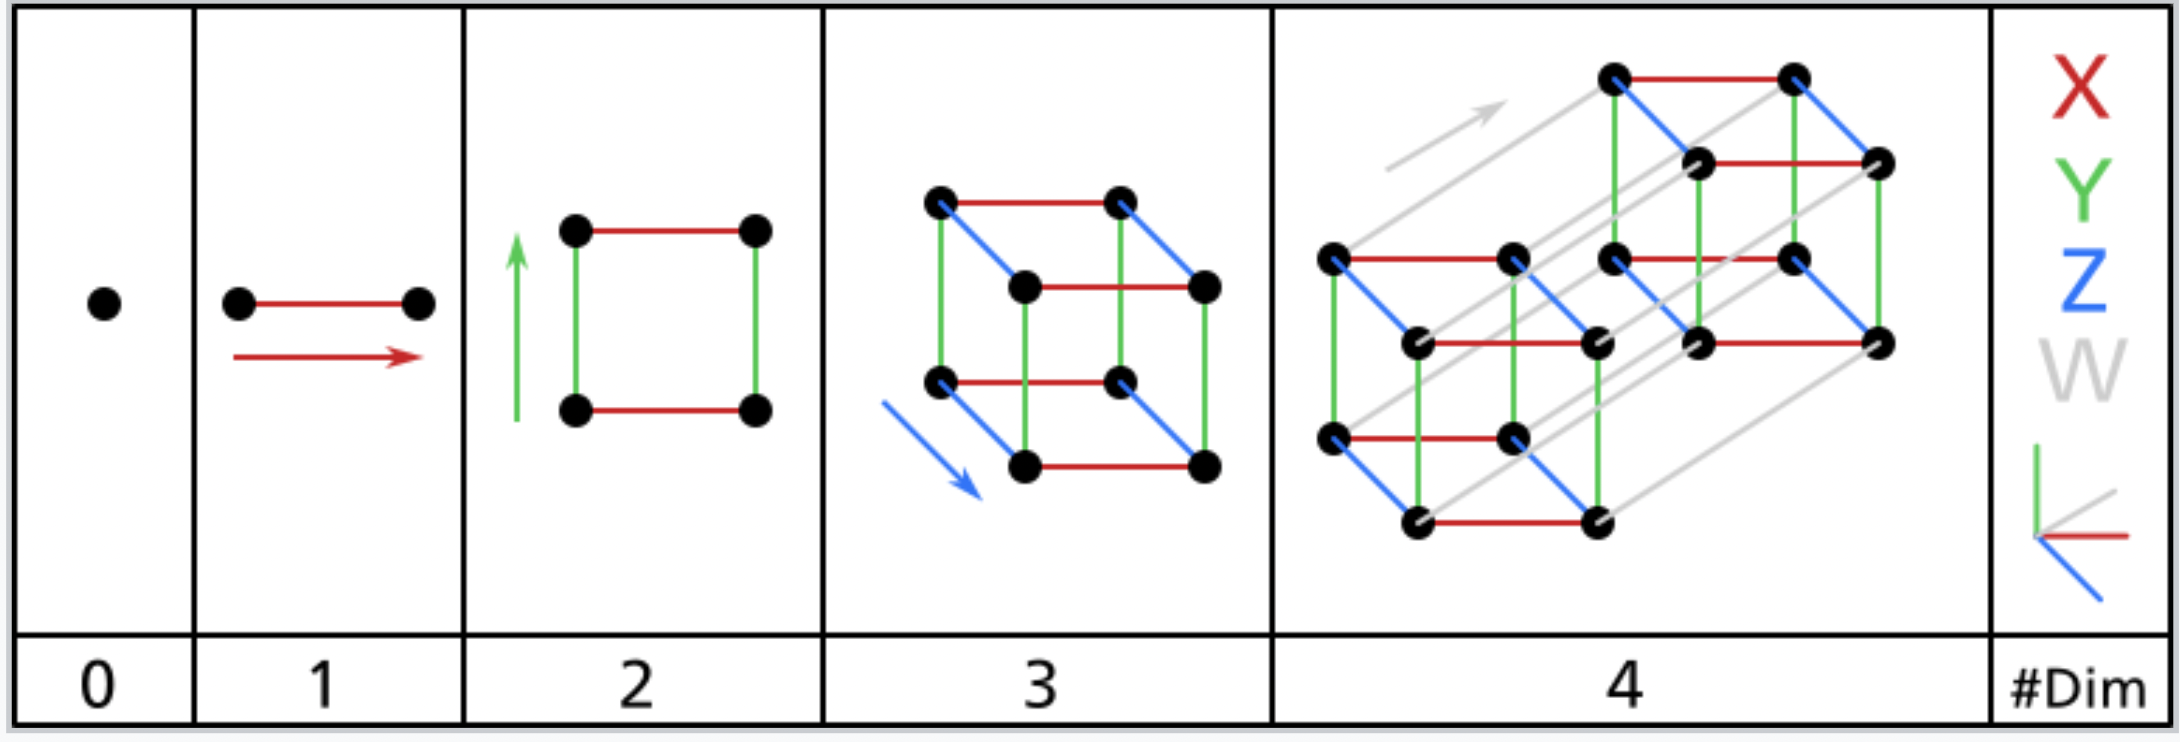

1] 각 차원에서 임의의 두 점 사이의 거리
- 2차원: 평균 0.52
- 3차원: 평균 0.66
- 1,000,000차원의 초입방체: 408.25 ♣ 차원 증가 -> 데이터와 데이터 사이 거리 증가 -> 일정 공간 내에서 획득할 수 있는 정보 감소
- 참조: https://en.wikipedia.org/wiki/Curse_of_dimensionality

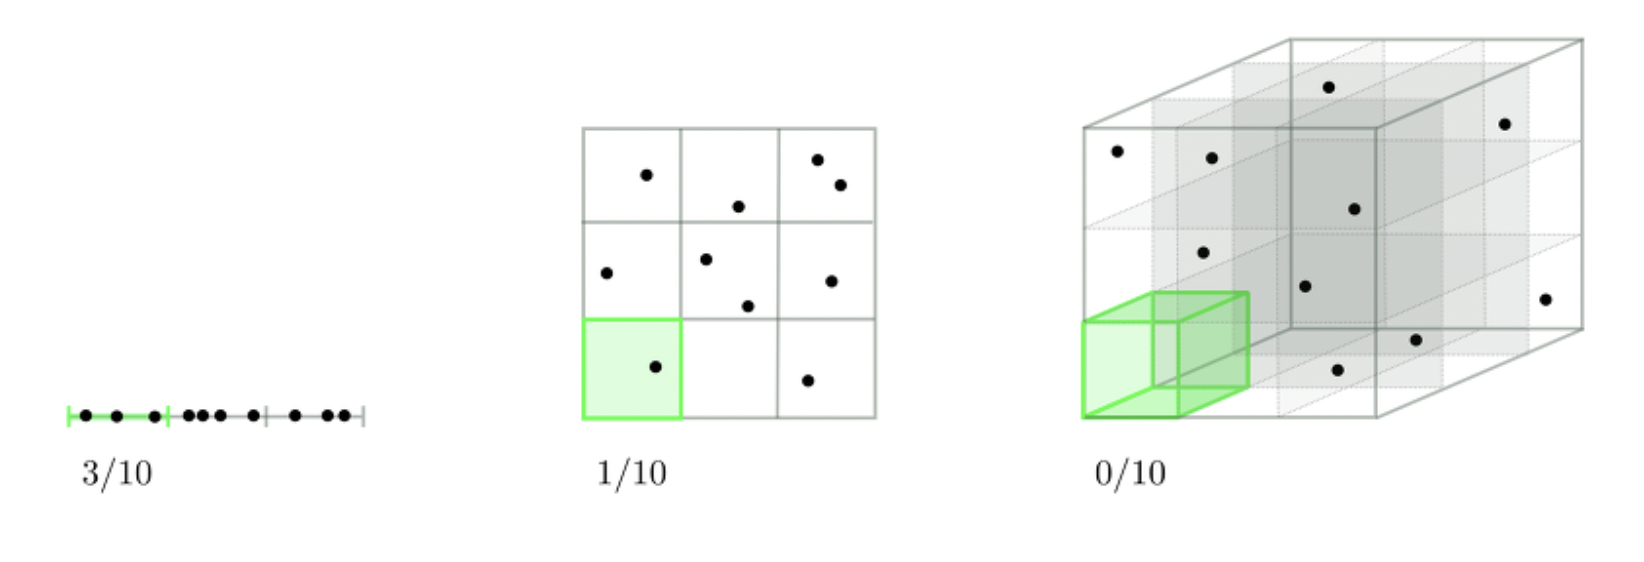

2] 데이터의 차원이 증가할수록 각 영역(region)에 포함되는 데이터의 개수
- 그림에서 알 수 있듯이 차원이 증가할 수록 데이터의 밀도가 희소해짐 ♣
- 참조: https://excelsior-cjh.tistory.com/167

3] 고차원에서 두 점 사이의 거리가 멀어지는 이유 ♣
- 고차원은 많은 공간을 가지고 있기 때문
- 고차원 데이터셋은 매우 희박할 위험이 있음 (즉, 훈련 데이터가 서로 멀리 떨어져 있음)
- 그 결과 과대적합 위험이 커짐

4] 차원의 저주 해결책
- 훈련 샘플의 밀도가 충분히 높아질 때까지 훈련 세트의 크기를 키우는 것
- 그러나, 훈련 샘플 수는 차원 수가 커짐에 따라 기하급수적으로 늘어남 ♣
- 100개 차원의 경우 훈련 샘플을 서로 평균 거리 0.1 이내에 위치시키려면 $10^{100}$개의 훈련 샘플이 필요

## 2. [해결책] 차원 축소를 위한 접근 방법

### 1) 차원 축소 종류

    (1) 투영(projection)
    (2) 매니폴드 학습(manifold learning)

### (1) 투영(projection)

#### 1] 배경 : 대부분의 실제 데이터는 훈련 샘플이 모든 차원에 걸쳐 균일하게 퍼져 있지 않음 ♣♣
- 훈련 샘플이 고차원 공간 안의 저차원 부분 공간(subspace)에 놓여 있음\
  ♣♣♣ xyz축이 존재하는 데이터를 자세히 보니, xy축 상에서만 데이터가 존재
  -> [단점 : 정보 소실] < [장점 : 훈련 속도 증가, 해석 용이성]
- 예: MNIST 데이터를 예로 들면 대부분의 이미지가 주변부를 제외한 중심부의 더 낮은 차원(적은 픽셀)인 부분 공간에 놓여 있다고 할 수 있음

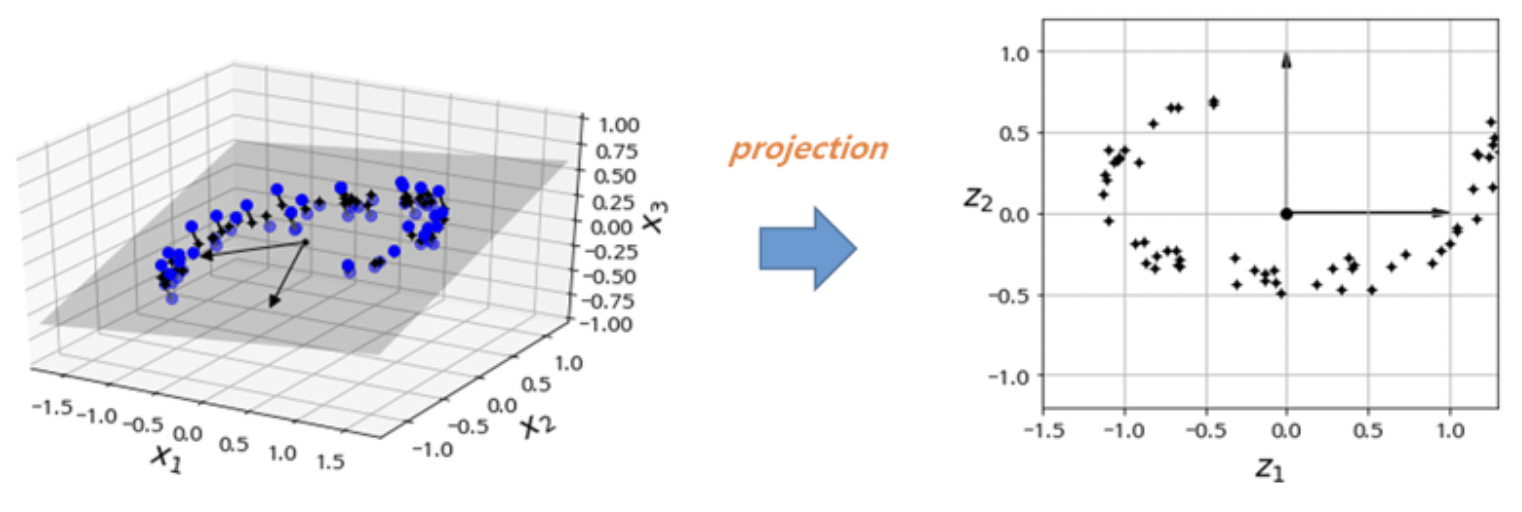

#### 2] 개념 : 고차원(3D) 공간 속 저차원(2D) 부분 공간
- 모든 훈련 샘플을 부분 공간에 수직으로 투영(projection)하면 위에서 오른쪽과 같은 2D 데이터셋 획득
- $(x1, x2, x3)$ --> $(z1, z2)$

#### 3] 단점 : 그러나, 차원 축소에서 언제나 투영이 최선의 방법은 아님 ♣
- 아래 스위스 롤(swiss roll) 데이터셋처럼 부분 공간이 뒤틀리거나 휘어진 경우
  - 그냥 평면에 투영시키면 스위스 롤 데이터셋의 층이 서로 뭉개짐
  - 필요한 것은 스위스 롤을 펼쳐서 unrolling된 2D 데이터셋을 얻는 것 --> 매니폴드 학습

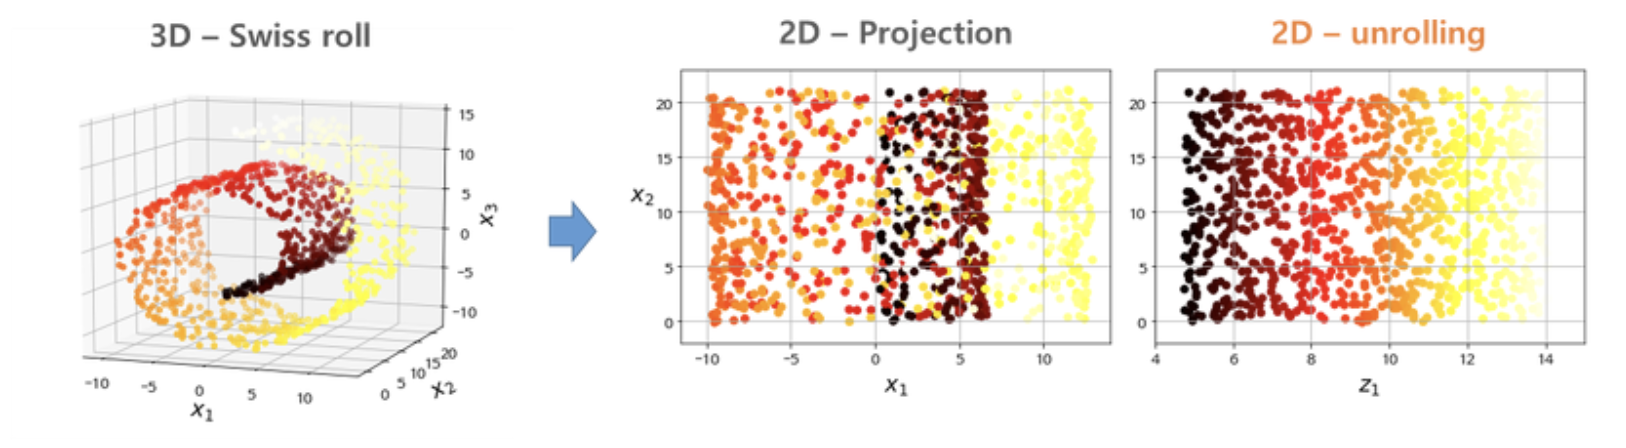

### (2) 매니폴드 학습(manifold learning)

#### 0] 사전 지식 : 매니폴드(manifold) ♣
- 고차원 공간에서 휘어지거나 뒤틀린 저차원의 모양
- $d$차원 매니폴드는 국부적으로 $d$차원 초평면으로 보일 수 있는 $n$차원 공간의 일부 $(d < n)$
- 스위스 롤의 경우 $d=2, n=3$ (즉, 국부적으로는 2D 평면으로 보이지만 3차원으로 말려 있음) ♣

#### 1] 개념 : 매니폴드 학습(manifold learning) ♣
- 많은 차원 축소 알고리즘이 훈련 샘플이 놓여 있는 매니폴드를 모델링하는 식으로 작동
- 매니폴드 가정(manifold assumption), 매니폴드 가설(manifold hypothesis)를 기반으로 함 ♣
  - 대부분 실제 고차원 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여 있음에 대한 가정/가설

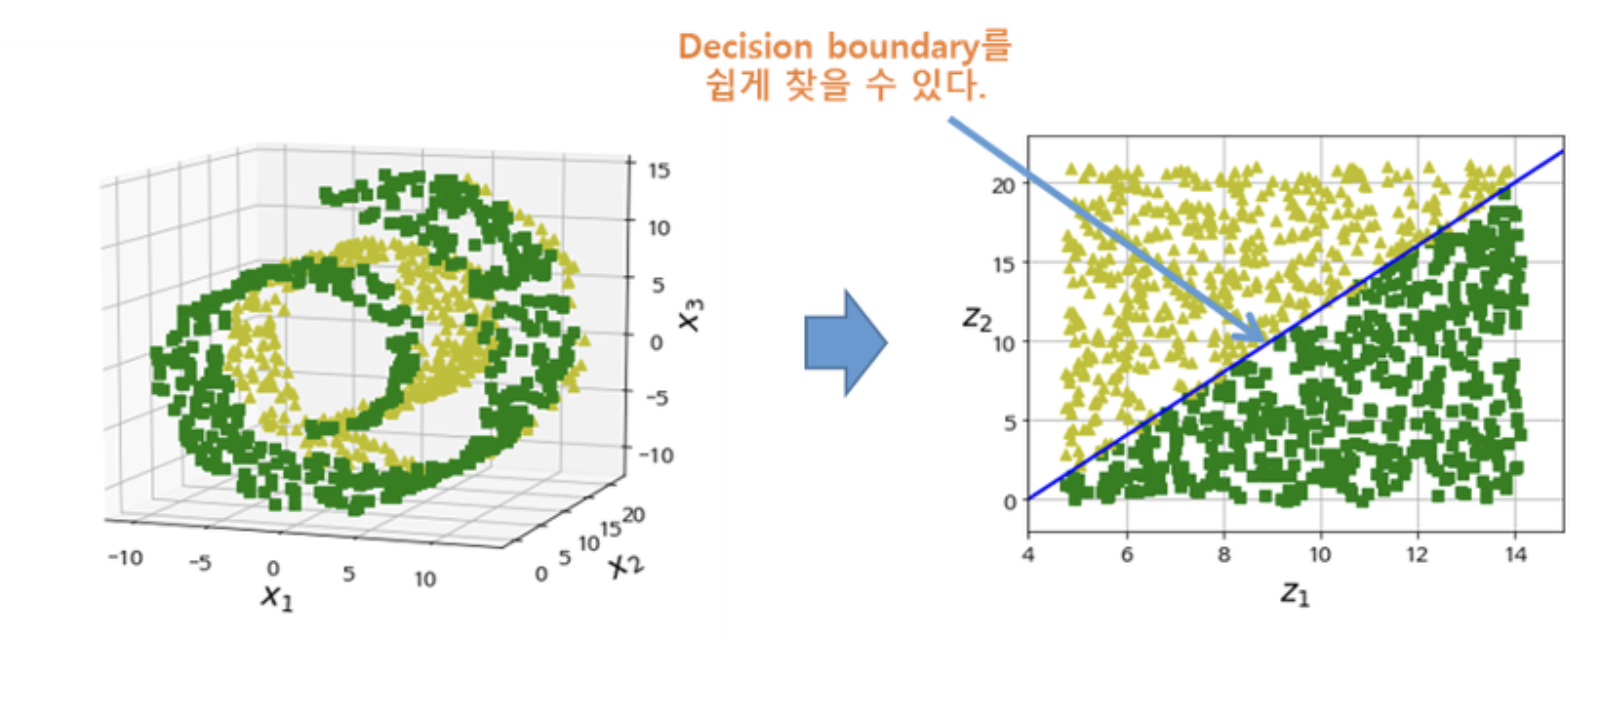

#### 2] 단점
- 그러나 이런 암묵적 가정이 항상 유효하지는 않음 (아래 예제) ♣

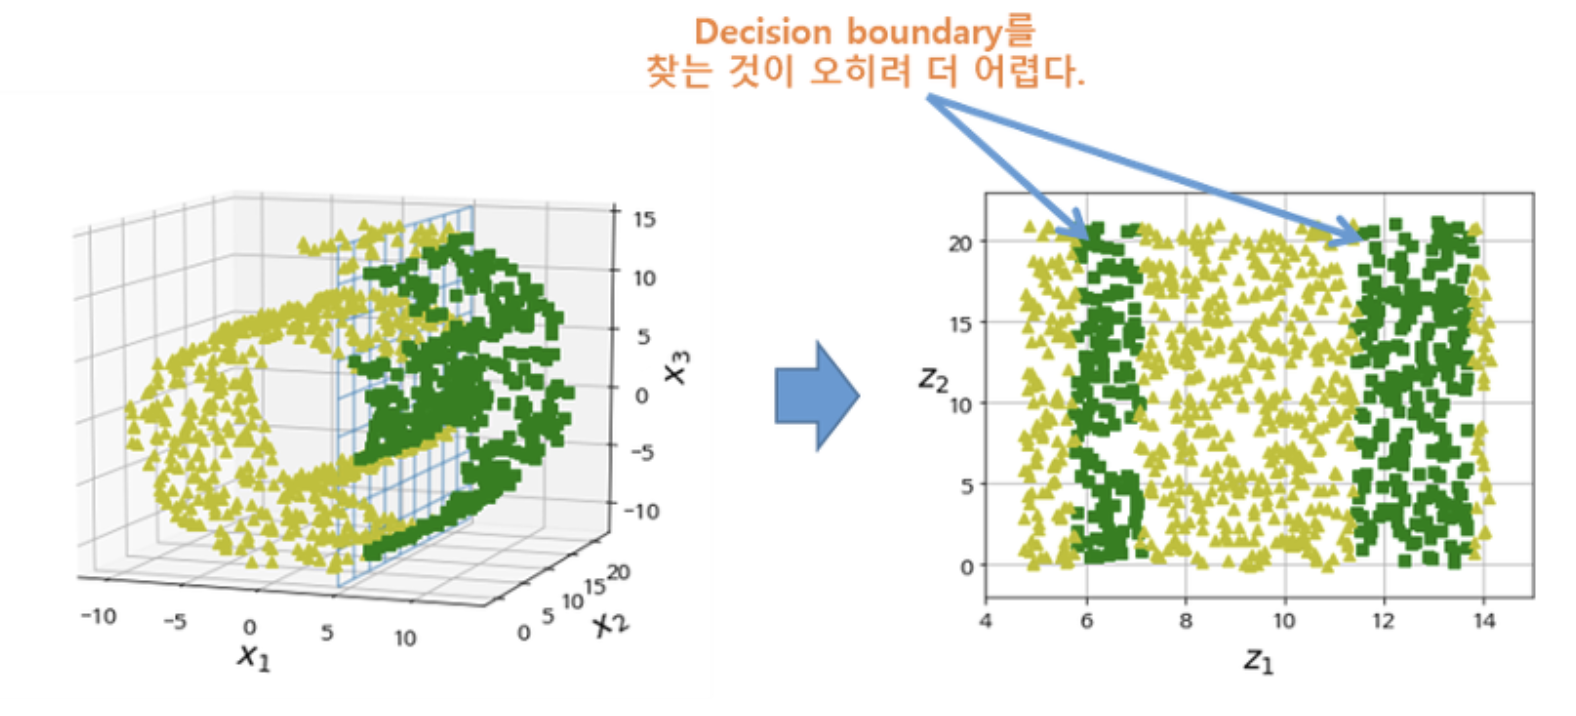

#### 3] 특징
- 모델을 훈련시키기 전 훈련 세트의 차원을 감소시키면 훈련 속도는 빨라짐
- 그러나 차원 축소가 항상 더 낫거나 간단한 솔루션이 되는 것은 아님 (전적으로 데이터셋에 달림) ♣ raw 데이터의 분포를 보고, 차원 축소를 할지 말지, 어떤 차원 축소 기법이 좋을지 결정해야한다

## 3. [알고리즘] PCA

### 1) 개념
- 주성분 분석(PCA; principal component analysis)은 가장 인기 있는 차원 축소 알고리즘 ♣♣
- 데이터에 가장 가까운 초평면(hyperplane)을 정의하고 데이터를 이 평면에 투영(projection)

### 2) 분산 보존 ♣

#### (1) 개념
- 저차원의 초평면에 훈련 세트를 투영하기 전에 먼저 올바른 초평면을 선택해야 함 ♣

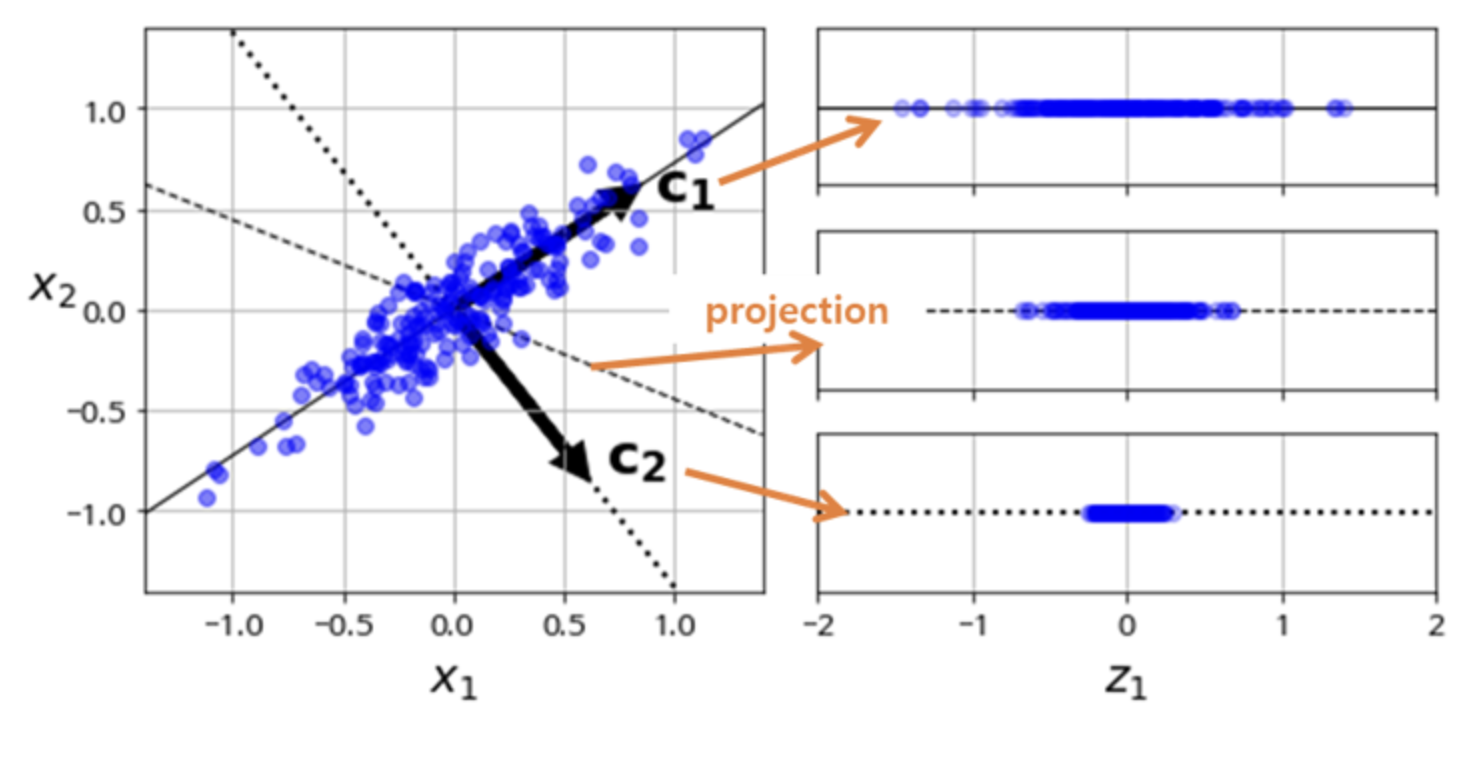

#### (2) 선정 : 올바른 초평면이란? ♣♣
- 분산이 최대로 보존되는 축을 선택하는 것이 정보가 가장 적게 손실되므로 합리적 ♣♣
- 원본 데이터셋과 투영된 것 사이의 평균 제곱 거리를 최소화하는 축 탐색 
   - 출처: https://www.tandfonline.com/doi/abs/10.1080/14786440109462720?journalCode=tphm17

### 3) 주성분 (principal component) ♣

#### (1) 순서 : 주성분 탐색 단계 ♣

1] 먼저 훈련 세트에서 분산이 최대인 축을 찾음\
2] 첫 번째 축에 직교하고 남은 분산을 최대한 보존하는 두 번째 축을 찾음 ♣ 2차원에서는 직교하는 선이 1개밖에 없는데, 100차원이 되면 직교하는 선이 99개가 존재한다.\
3] 이런식으로 반복하며 찾는 $i$번째 축을 이 데이터의 $i$번째 주성분(PC; principal component)이라고 부름

#### (2) 방법 : 훈련 세트의 주성분을 찾는법 ♣♣♣
- 특잇값 분해(SVD; singular value decomposition)라는 표준 행렬 분해 기술 활용

$X = U \sum V^T$ 에서 $V$가 주성분

* (m, m) (m, n) (n, n)

m: 샘플 개수, n: 특성 개수

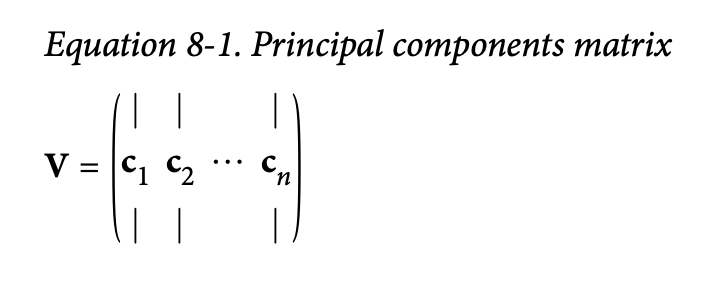

3D 데이터셋 생성

In [1]:
import numpy as np

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

#### (3) 주의 사항 : PCA는 데이터셋의 평균이 0이라고 가정함 ♣♣♣
- 따라서 데이터를 원점에 맞추는 것을 잊어서는 안됨

In [2]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [3]:
c1

array([0.93636116, 0.29854881, 0.18465208])

In [4]:
c2

array([-0.34027485,  0.90119108,  0.2684542 ])

### 4) d차원으로 투영하기 ♣

#### (1) 개념 : 주성분을 추출한 후, 처음 $d$개의 주성분으로 정의한 초평면에 투영하여 데이터셋의 차원을 $d$차원으로 축소 ♣ 3차원이라면 2차원으로 축소
- 이 초평면은 분산을 가능한 한 최대로 보존하는 투영임을 보장

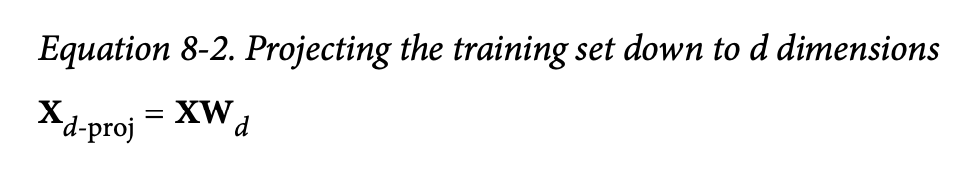

In [5]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [7]:
X2D

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049],
       [ 1.10436914, -0.20204953],
       [-1.27265808, -0.46781247],
       [ 0.44933007, -0.67736663],
       [ 1.09356195,  0.04467792],
       [ 0.66177325,  0.28651264],
       [-1.04466138,  0.11244353],
       [ 1.05932502, -0.31189109],
       [-1.13761426, -0.14576655],
       [-1.16044117, -0.36481599],
       [ 1.00167625, -0.39422008],
       [-0.2750406 ,  0.34391089],
       [ 0.45624787, -0.69707573],
       [ 0.79706574,  0.26870969],
       [ 0.66924929, -0.65520024],
       [-1.30679728, -0.37671343],
       [ 0.6626586 ,  0.32706423],
       [-1.25387588, -0.56043928],
       [-1.04046987,  0.08727672],
       [-1.26047729, -0.1571074 ],
       [ 1.09786649, -0.38643428],
       [ 0.7130973 , -0.64941523],
       [-0.17786909,  0.43609071],
       [ 1.02975735, -0.33747452],
       [-0.94552283,

In [6]:
X2D_using_svd = X2D

### 5) 사이킷런 사용하기

사이킷런에서는 PCA가 아주 간단 (데이터셋에서 평균을 빼는 작업도 대신 처리) ♣

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [9]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [10]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

위 예에서 사이킷런의 PCA는 두 축이 반대로 뒤집힌 것외에는 SVD 방식을 사용한 것과 동일한 투영 결과를 만듦

### 6) 설명된 분산의 비율 ♣♣

explained_variance_ratio_ 변수를 통한 설명된 분산의 비율(explained variance ratio)

In [11]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

설명 해석 ♣♣♣
- 첫 번째 차원이 84.2%의 분산을 포함하고 있고 두 번째는 14.6%의 분산을 설명함
- 2D로 투영했기 때문에 분산의 1.1%을 잃었음

In [12]:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

### 7) 적절한 차원 수 선택하기 ♣

#### (1) 방법

- 축소할 차원 수를 임의로 정하기보다는 충분한 분산(예: 95%)을 기준으로 하면 좋음 ♣♣♣ 도메인에 따라, 목적에 따라 달라지는 분산 기준 -> 해당 분야의 가이드라인, 논문을 찾아보면 된다
- 데이터 시각화를 위해 2-3개로 차원 축소하는 것이 일반적 ♣
- 아래 코드는 차원 수 계산의 과정

In [13]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [14]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [16]:
d

154

차원의 수를 시각적으로 표현

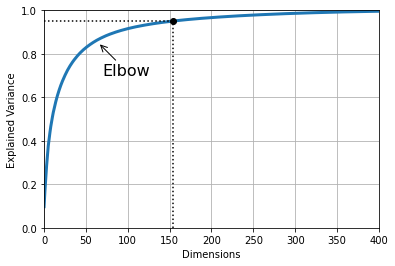

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)

plt.show()

♣♣ elbow 위치 : [학습 속도 <-> 성능], [차원의 개수 <-> 기대 분산]과 같은 두 가지 변수를 고려했을 때 효율성이 높은 부분

### 8) 압축을 위한 PCA - 재구성 오차

#### (1) 개념

차원을 축소하고 난 후 훈련 세트의 크기가 줄어듦 ♣
- 예: MNIST 데이터셋의 경우 기존 784개 특성 --> 150개 정도로 줄어듦
- 분산은 유지되지만 데이터셋은 원본 크기의 20% 미만으로 감소 (데이터 압축)
- 압축된 데이터셋에 PCA 투영을 반대로 적용해 784개의 차원으로 되돌릴 수 있음 ♣♣
  - 그러나, 투영에서 일정량의 정보(유실된 5% 분산)를 잃어버렸기 때문에 원본 데이터셋을 얻을 수는 없음 ♣♣
  - 원본 데이터와 매우 비슷할 것임 ♣

재구성 오차(reconstruction error) ♣♣♣
- 원본 데이터와 재구성된 데이터(압축 후 원복한 것) 사이의 평균 제곱 거리
- 아래는 MNIST 데이터셋 예시

In [31]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [32]:
import matplotlib as mpl

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # n_rows = ceil(len(instances) / images_per_row) 와 동일합니다:
    n_rows = (len(instances) - 1) // images_per_row + 1

    # 필요하면 그리드 끝을 채우기 위해 빈 이미지를 추가합니다:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # 배열의 크기를 바꾸어 28×28 이미지를 담은 그리드로 구성합니다:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # 축 0(이미지 그리드의 수직축)과 2(이미지의 수직축)를 합치고 축 1과 3(두 수평축)을 합칩니다. 
    # 먼저 transpose()를 사용해 결합하려는 축을 옆으로 이동한 다음 합칩니다:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # 하나의 큰 이미지를 얻었으므로 출력하면 됩니다:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Compressed')

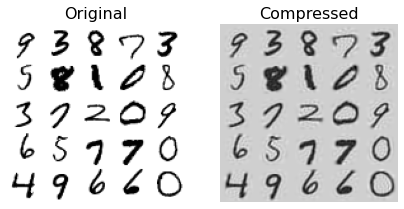

In [33]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

이러한 역변환 과정은 아래와 같음

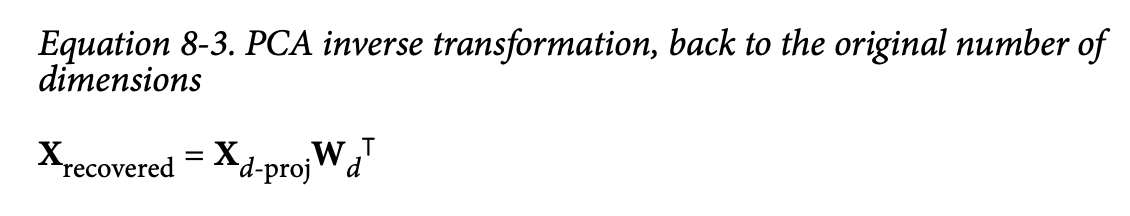

### 9) PCA 종류

In [34]:
X_reduced_pca = X_reduced

### (1) 랜덤 PCA ♣

#### 1] 개념

- 확률적 알고리즘을 사용해 처음 $d$개의 주성분에 대한 근삿값을 빠르게 찾는 것 ♣♣

#### 2] 특징

- 완전 SVD와 비교했을 때 계산 복잡도가 낮음 ♣♣♣
  - 완전 SVD 방식: $O(m*n^2)+O(n^3)$
  - 랜덤 PCA 방식: $O(m*d^2)+O(d^3)$
- 따라서, $d$가 $n$보다 많이 작으면 완전 SVD와 비교해 훨씬 빨라짐 ♣♣♣

랜덤 PCA 예제 코드 (svd_solver 매개변수를 "randomized"로 지정)

In [35]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

svd_solver 설정 ♣♣
- svd_solver의 기본값은 "auto"로 $m$이나 $n$이 500보다 크고, $d$가 $m$이나 $n$의 80%보다 작으면 사이킷런은 자동으로 랜덤 PCA 알고리즘 사용 (아니면 완전 SVD 방식 사용)
- 완전 SVD 방식을 강제하려면 svd_solver 매개변수를 "full"로 지정

### (2) 점진적 PCA (IPCA; incremental PCA) ♣

#### 1] 개념

- SVD 알고리즘 실행 위해 전체 훈련 세트를 메모리에 올려야 하는 문제 발생 ♣♣♣
- 문제 해결 위해, 훈련 세트를 미니배치로 나눈 뒤 IPCA 알고리즘에 한 번에 하나씩 주입 ♣♣♣

#### 2] 특징

- IPCA는 훈련 세트가 클 때 유용하고 온라인으로 PCA를 적용할 수 있음 ♣♣

In [36]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # 책에는 없음
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [37]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

압축 확인

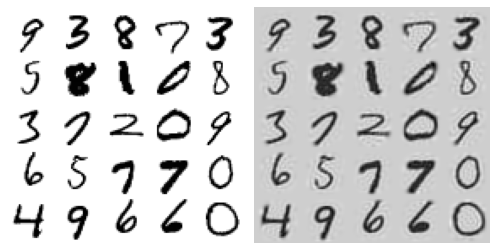

In [38]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [39]:
X_reduced_inc_pca = X_reduced

일반 PCA와 점진적 PCA로 MNIST 데이터를 변환한 결과를 비교
- 먼저 평균이 같은지 확인

In [40]:
np.allclose(pca.mean_, inc_pca.mean_)

True

- 하지만 결과는 완전히 동일하지 않음 (즉, 점진적 PCA는 아주 훌륭한 근사치를 제공하지만 완벽하지는 않음) ♣

In [41]:
np.allclose(X_reduced_pca, X_reduced_inc_pca)

False

### 10) 시간 복잡도 비교

#### (1) 주성분 개수 변화

- 주성분 개수를 바꾸어가며 점진적 PCA와 랜덤 PCA에 비해 일반 PCA 시간을 비교 ♣♣ 주성분이 크면 일반 PCA와 random PCA가 유사한 시간. 주성분이 작으면 일반 PCA보다 random PCA가 훨씬 빠른 시간

- 주성분 개수 증가 ♣♣♣
    - 시간소모 증가폭 : PCA < RPCA

In [42]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

In [43]:
import time

for n_components in (2, 10, 154):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components, svd_solver="full")
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")

    for pca in (regular_pca, inc_pca, rnd_pca):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print("    {}: {:.1f} 초".format(pca.__class__.__name__, t2 - t1))

n_components = 2
    PCA: 15.2 초
    IncrementalPCA: 29.5 초
    PCA: 3.3 초
n_components = 10
    PCA: 11.6 초
    IncrementalPCA: 25.3 초
    PCA: 3.7 초
n_components = 154
    PCA: 16.9 초
    IncrementalPCA: 53.1 초
    PCA: 10.4 초


#### (2) 샘플 개수 변화

- 데이터셋의 크기(샘플의 수)를 바꾸어가며 일반 PCA와 랜덤 PCA를 비교

- 샘플 개수 증가 ♣♣♣
    - 시간소모 : PCA < RPCA

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

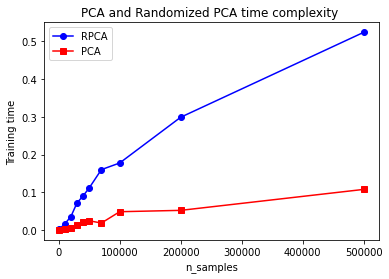

In [44]:
times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    pca = PCA(n_components=2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

#### (3) 특성 개수 변화

- 특성의 개수를 달리하면서 2,000 샘플이 있는 데이터셋에서 성능을 비교

- 특성 개수 증가 ♣♣
    - 시간소모 : RPCA < PCA

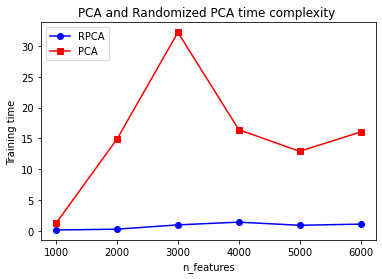

In [45]:
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components=2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")
plt.show()

### 9) PCA 종류 이어서

### (3) 커널 PCA ♣

#### 1] 개념

- 커널트릭을 활용한 PCA ♣♣
  - 샘플을 매우 높은 고차원 공간(특성 공간, feature space)에 암묵적으로 매핑 ♣
  - 고차원 특성 공간에서의 선형 결정 경계는 원본 공간에서는 복잡한 비선형 결정 경계에 해당함 ♣

In [47]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [48]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

(단순 PCA를 사용한 것과 동일한) 선형 커널, RBF 커널, 시그모이드 커널을 사용해 2D로 축소시킨 스위스 롤 데이터셋

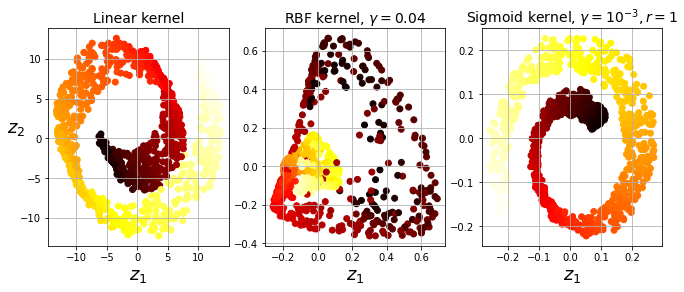

In [49]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

#### 2] 커널 선택과 하이퍼파라미터 튜닝

좋은 커널과 하이퍼파라미터를 선택하기 ♣
- kPCA를 사용해 차원을 2차원으로 축소 ♣♣
- 분류를 위해 로지스틱 회귀 적용 ♣♣
- GridSearchCV를 사용해 kPCA의 가장 좋은 커널과 gamma 파라미터 탐색
  - 재구성 원상 오차를 최소화하는 커널과 하이퍼파라미터를 그리드 탐색

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [51]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


재구성 원상(pre-image)과 원본 샘플 간의 제곱 거리를 최소화하는 하이퍼파라미터를 사용 ♣♣

In [52]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

재구성 원상 오차 계산 ♣

In [53]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.78630879576613

### (4) LLE (지역 선형 임베딩, locally linear embedding) ♣

#### 1] 개념

- 강력한 비선형 차원 축소(NLDR; nonlinear dimensionality reduction) 기술 ♣♣
- 투영에 의존하지 않는 매니폴드 학습 ♣♣
  - 각 훈련 샘플이 가장 가까운 이웃(c.n.; closest neighbor)에 얼마나 선형적으로 연관되어 있는지 측정
  - 국부적 관계가 가장 잘 보존되는 훈련 세트의 저차원 표현을 찾음

In [54]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [55]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

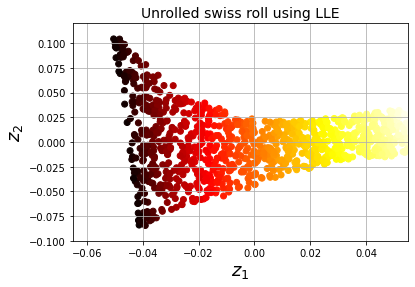

In [56]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()

#### 2] LLE 작동 방식 ♣♣ closed to neighbor만 w를 제공. w의 총합이 1이 되도록 정규화

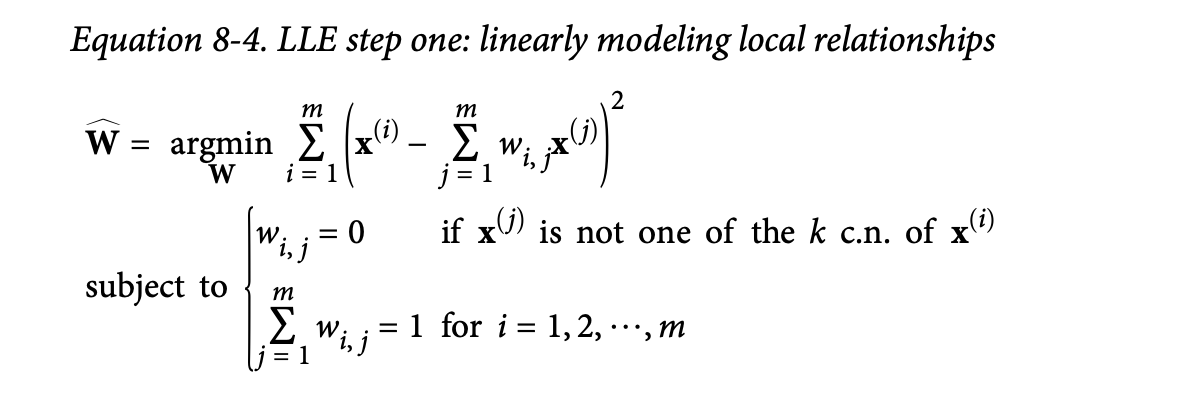

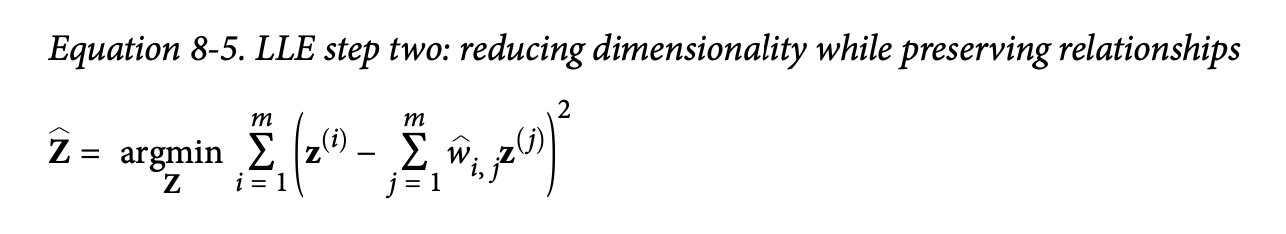

### (5) 다른 차원 축소 기법 ♣

#### 1] 다차원 스케일링(MDS; multidimensional scaling) ♣♣
- 샘플 간의 거리를 보존하면서 차원을 축소

In [57]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

#### 2] Isomap ♣♣
- 각 샘플을 가장 가까운 이웃과 연결하는 식으로 그래프를 만듦
- 그런 다음 샘플 간의 지오데식 거리(geodesic distance)를 유지하면서 차원을 축소

In [58]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

#### 3] t-SNE(t-distributed stochastic neighbor embedding) ♣♣
- 비슷한 샘플은 가까이, 비슷하지 않은 샘플은 멀리 떨어지도록 하면서 차원을 축소
- 고차원 공간에 있는 샘플의 군집을 시각화할 때 많이 사용 (예: MNIST 데이터셋을 2D로 시각화)

In [59]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


그림 저장 other_dim_reduction_plot


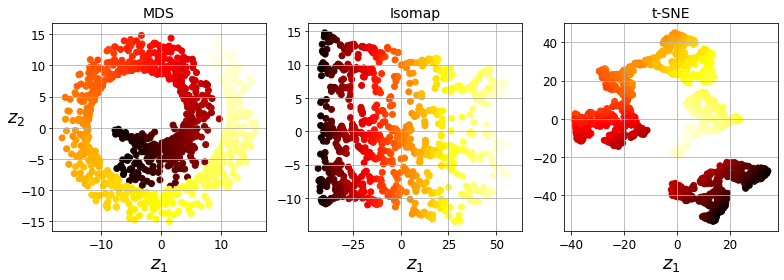

In [ ]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

**<여러 가지 기법을 사용해 스위스 롤을 2D로 축소>**